Canadian Fires Tweets

In [3]:
# 

!pip install requests
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install wordcloud






[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [9]:
import requests
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import requests
import pandas as pd
import plotly.express as px

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

# API key from News API
api_key = '8558ff06892d4e99bab50611cbd38334'

# Endpoint URL
url = 'https://newsapi.org/v2/everything'

# Parameters for the request
params = {
    'q': 'Canadian wildfires',  # Search query for Canadian wildfires
    'from': '2023-06-20',  # Starting date
    'to': '2023-07-20', # Ending date
    'sortBy': 'popularity',  # Sort by popularity
    'apiKey': api_key  # Your API key
}

# Make a GET request to the API endpoint
response = requests.get(url, params=params)

# Check the response status code
if response.status_code == 200:
    # Request was successful
    data = response.json()  # Parse the response as JSON
    # Process the data as needed
    articles = data['articles']
    for article in articles:
        print(article['title'])
else:
    # Request was unsuccessful
    print(f"Request failed with status code {response.status_code}")


Canada wildfires spark air quality alerts in Chicago and Milwaukee
Young firefighter killed as Canada battles wildfires
Trudeau pays tribute to firefighter, 19, killed battling Canada wildfires
Canada faces ‘long, tough summer’ of wildfires with even hotter temperatures
Weather tracker: 100m people in US under air quality warnings as wildfires spread
Canada mourns deaths of firefighters as wildfires ravage millions of acres
Weather tracker: Toronto and New York ranked most polluted from Canada wildfires
‘It burns wild and free up there’: Canada fires force US crews to shift strategy
Heatwave in south and wildfire smoke in north buffet US from both sides
This heatwave is a climate omen. But it’s not too late to change course | Michael E Mann and Susan Joy Hassol
US temperatures continue to rise as millions affected by extreme heat and wildfire smoke – live
Cabaret legend Justin Vivian Bond: ‘When I sing, you can hear the drinks and cigarettes I’ve had’
‘Uncharted territory’: UN declares

In [6]:
import pandas as pd

# ... (the rest of your code) ...

if response.status_code == 200:
    # Request was successful
    data = response.json()  # Parse the response as JSON
    # Process the data as needed
    articles = data['articles']

    # Convert articles to DataFrame
    df = pd.DataFrame(articles)

    print(df)
else:
    # Request was unsuccessful
    print(f"Request failed with status code {response.status_code}")
    




                                         source  \
0        {'id': 'bbc-news', 'name': 'BBC News'}   
1        {'id': 'bbc-news', 'name': 'BBC News'}   
2          {'id': None, 'name': 'The Guardian'}   
3          {'id': None, 'name': 'The Guardian'}   
4          {'id': None, 'name': 'The Guardian'}   
..                                          ...   
95       {'id': 'cbc-news', 'name': 'CBC News'}   
96  {'id': None, 'name': 'Nakedcapitalism.com'}   
97  {'id': None, 'name': 'Nakedcapitalism.com'}   
98  {'id': None, 'name': 'Nakedcapitalism.com'}   
99     {'id': None, 'name': 'Psychology Today'}   

                                        author  \
0             https://www.facebook.com/bbcnews   
1             https://www.facebook.com/bbcnews   
2      Reuters in Revelstoke, British Columbia   
3                     Leyland Cecco in Toronto   
4   Theo Gkousarov and Matt Williams (Metdesk)   
..                                         ...   
95                                   

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

# Define English stop words
stop_words = stopwords.words('english')

# Add 'chars' and 'li' to the list of stop words
stop_words.extend(['chars', 'li'])

# Create two CountVectorizers
vectorizer_title = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
vectorizer_content = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))

# Fit and transform the title and content of the articles
X_title = vectorizer_title.fit_transform(df['title'])
X_content = vectorizer_content.fit_transform(df['content'])

# Create DataFrames from the transformed data
count_df_title = pd.DataFrame(X_title.toarray(), columns=vectorizer_title.get_feature_names_out())
count_df_content = pd.DataFrame(X_content.toarray(), columns=vectorizer_content.get_feature_names_out())

# Sum up the counts of each word
word_counts_title = count_df_title.sum(axis=0)
word_counts_content = count_df_content.sum(axis=0)

# Sort the words by frequency
word_counts_sorted_title = word_counts_title.sort_values(ascending=False)
word_counts_sorted_content = word_counts_content.sort_values(ascending=False)

# Get the 10 most common words
top_10_title = word_counts_sorted_title.head(10)
top_10_content = word_counts_sorted_content.head(10)

# Create a DataFrame for top 10 words in titles
top_10_title_df = top_10_title.reset_index()
top_10_title_df.columns = ['word', 'count']

# Create a DataFrame for top 10 words in content
top_10_content_df = top_10_content.reset_index()
top_10_content_df.columns = ['word', 'count']

# Create plotly figures
fig_title = px.bar(top_10_title_df, x='word', y='count', title='Top 10 most frequent words in titles',
                   labels={'word': 'Words', 'count': 'Count'}, color='count', color_continuous_scale='Viridis')
fig_content = px.bar(top_10_content_df, x='word', y='count', title='Top 10 most frequent words in content',
                     labels={'word': 'Words', 'count': 'Count'}, color='count', color_continuous_scale='Viridis')

# Show the plots
fig_title.show()
fig_content.show()

# save as html

fig_title.write_html('top_10_words_titles.html', auto_open=True)
fig_content.write_html('top_10_words_content.html', auto_open=True)

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
import nltk
import plotly.express as px

# Define English stop words
stop_words = stopwords.words('english')

# Add 'chars' and 'li' to the list of stop words
stop_words.extend(['chars', 'li'])

# Replace 'Canadian wildfires' with 'canadian_wildfires' in the title and content
df['title'] = df['title'].apply(lambda x: re.sub('Canadian wildfires', 'canadian_wildfires', x, flags=re.IGNORECASE))
df['content'] = df['content'].apply(lambda x: re.sub('Canadian wildfires', 'canadian_wildfires', x, flags=re.IGNORECASE))

# Tokenize the text into sentences
title_sentences = nltk.sent_tokenize(' '.join(df['title']))
content_sentences = nltk.sent_tokenize(' '.join(df['content']))

# Find sentences that contain 'canadian_wildfires'
relevant_title_sentences = [sentence for sentence in title_sentences if 'canadian_wildfires' in sentence.lower()]
relevant_content_sentences = [sentence for sentence in content_sentences if 'canadian_wildfires' in sentence.lower()]

# Join the relevant sentences back into a single text
title_text = ' '.join(relevant_title_sentences)
content_text = ' '.join(relevant_content_sentences)

# Create two CountVectorizers
vectorizer_title = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
vectorizer_content = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))

# Fit and transform the title and content of the articles
X_title = vectorizer_title.fit_transform([title_text])
X_content = vectorizer_content.fit_transform([content_text])

# Create DataFrames from the transformed data
count_df_title = pd.DataFrame(X_title.toarray(), columns=vectorizer_title.get_feature_names_out())
count_df_content = pd.DataFrame(X_content.toarray(), columns=vectorizer_content.get_feature_names_out())

# Sum up the counts of each word
word_counts_title = count_df_title.sum(axis=0)
word_counts_content = count_df_content.sum(axis=0)

# Sort the words by frequency
word_counts_sorted_title = word_counts_title.sort_values(ascending=False)
word_counts_sorted_content = word_counts_content.sort_values(ascending=False)

# Get the 10 most common words
top_10_title = word_counts_sorted_title.head(10)
top_10_content = word_counts_sorted_content.head(10)

# Create a DataFrame for top 10 words in titles
top_10_title_df = top_10_title.reset_index()
top_10_title_df.columns = ['word', 'count']

# Create a DataFrame for top 10 words in content
top_10_content_df = top_10_content.reset_index()
top_10_content_df.columns = ['word', 'count']

# Create plotly figures
fig_title = px.bar(top_10_title_df, x='word', y='count', title='Top 10 most frequent words in titles containing "canadian_wildfires"',
                   labels={'word': 'Words', 'count': 'Count'}, color='count', color_continuous_scale='Viridis')
fig_content = px.bar(top_10_content_df, x='word', y='count', title='Top 10 most frequent words in content containing "canadian_wildfires"',
                     labels={'word': 'Words', 'count': 'Count'}, color='count', color_continuous_scale='Viridis')

# Show the plots
fig_title.show()
fig_content.show()

# Save the figures as HTML files
fig_title.write_html('top_10_words_titles.html', auto_open=True)
fig_content.write_html('top_10_words_content.html', auto_open=True)



In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
import pandas as pd
import matplotlib.pyplot as plt

# Define English stop words
stop_words = stopwords.words('english')

# Add 'chars' to the list of stop words
stop_words.extend(['chars', 'li'])

# Combine all the articles' content into a single text
text = ' '.join(df['content'])

# Create a CountVectorizer for bigrams
bigram_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(2, 2))

# Fit and transform the content of the articles
X_bigram = bigram_vectorizer.fit_transform([text])

# Create a DataFrame from the transformed data
bigram_df = pd.DataFrame(X_bigram.toarray(), columns=bigram_vectorizer.get_feature_names_out())

# Get the column names containing 'new' or 'across'
new_bigrams = [col for col in bigram_df.columns if 'new' in col.split()]
across_bigrams = [col for col in bigram_df.columns if 'across' in col.split()]

# Get the counts for these bigrams
new_bigram_counts = bigram_df[new_bigrams].sum(axis=0)
across_bigram_counts = bigram_df[across_bigrams].sum(axis=0)

# Display the 10 most common bigrams with 'new' and 'across'
print('Most common bigrams with "new":')
print(new_bigram_counts.sort_values(ascending=False).head(10))
print('\nMost common bigrams with "across":')
print(across_bigram_counts.sort_values(ascending=False).head(10))


Most common bigrams with "new":
new york        9
new orleans     2
new yorkers     2
axios new       1
swept new       1
swarming new    1
store new       1
skies new       1
signal new      1
shows new       1
dtype: int64

Most common bigrams with "across":
across canada     6
raging across     4
fires across      4
spread across     2
across count      2
across country    2
across north      2
people across     2
across aff        1
cities across     1
dtype: int64


In [35]:
import plotly.express as px

topics = {
    'loss_of_life': ['death', 'fatal', 'fatalities', 'loss of life', 'killed', 'died'],
    'canadian_perspective': ['canada', 'canadian', 'ontario', 'british columbia', 'alberta', 'quebec', 'toronto', 'vancouver', 'montreal'],
    'environment': ['environment', 'ecology', 'climate', 'nature', 'wildlife', 'species', 'habitat'],
    'air_quality': ['air quality', 'smoke', 'pollution', 'haze', 'particulates', 'smog'],
    'us_perspective': ['us', 'united states', 'america', 'american', 'u.s.', 'states', 'usa', 'new york']
    }

topic_counts = {}

# Iterate over all topics
for topic, keywords in topics.items():
    topic_count = 0
    # Iterate over all keywords in each topic
    for keyword in keywords:
        # Count the number of times each keyword appears in the text
        topic_count += df['content'].str.contains(keyword, case=False).sum()
    # Store the total count for each topic
    topic_counts[topic] = topic_count

# Convert to a DataFrame for Plotly
topic_counts_df = pd.DataFrame(list(topic_counts.items()), columns=['Topic', 'Count'])

# Create the Plotly figure
fig = px.bar(topic_counts_df, x='Topic', y='Count', title='Frequency of specific topics in articles', 
             labels={'Count':'Number of articles'}, color='Topic')

# Show the figure
fig.show()

# Save the figure as HTML files
fig_title_html = 'top_topics_title.html'
fig_content_html = 'top_topics_content.html'
fig.write_html(fig_title_html, auto_open=True)
fig.write_html(fig_content_html, auto_open=True)

print(f"Figure saved as {fig_title_html} and {fig_content_html}")

Figure saved as top_topics_title.html and top_topics_content.html


In [36]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the 'df' dataframe with the articles data

# Convert the 'publishedAt' column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Calculate the daily counts of articles
daily_counts = df['publishedAt'].dt.date.value_counts().sort_index()

# Create a plotly figure
fig = go.Figure(data=go.Scatter(x=daily_counts.index, y=daily_counts.values, mode='lines'))

# Update layout for better visualization
fig.update_layout(title='Number of articles per day',
                  xaxis_title='Date',
                  yaxis_title='Number of Articles')

# Show the plot
fig.show()

# Save the figure as HTML files
fig_title_html = 'top_topics_title.html'
fig_content_html = 'top_topics_content.html'
fig.write_html(fig_title_html, auto_open=True)
fig.write_html(fig_content_html, auto_open=True)

print(f"Figure saved as {fig_title_html} and {fig_content_html}")


Figure saved as top_topics_title.html and top_topics_content.html


In [30]:
# Identify the day with the highest number of articles
peak_days = daily_counts.nlargest(3).index
print(peak_days)

# Convert 'publishedAt' to datetime if not already
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Create a 'date' column from 'publishedAt'
df['date'] = df['publishedAt'].dt.date

# Calculate the number of articles published each day
daily_counts = df.groupby('date').size()

# Identify the days with the highest number of articles
peak_days = daily_counts.nlargest(3)

# Filter the DataFrame to include only articles from peak days
peak_articles = df[df['date'].isin(peak_days.index)]

# Print the titles of the articles from the peak days
for i, title in enumerate(peak_articles['title'], 1):
    print(f'Article {i}: {title}')



Index([2023-06-29, 2023-06-28, 2023-06-30], dtype='object', name='publishedAt')
Article 1: Weather tracker: 100m people in US under air quality warnings as wildfires spread
Article 2: ‘It burns wild and free up there’: Canada fires force US crews to shift strategy
Article 3: Heatwave in south and wildfire smoke in north buffet US from both sides
Article 4: US temperatures continue to rise as millions affected by extreme heat and wildfire smoke – live
Article 5: Up First briefing: smoke and heat waves; French protests; gravitational waves
Article 6: Smog warning for Montreal area: Environment Canada - CTV News Montreal
Article 7: Smoke From canadian_wildfires Leaves Detroit With Some of the Worst U.S. Air Quality
Article 8: Expect A Hot, Smoky Summer In Much Of America. Here’s Why You’d Better Get Used To It.
Article 9: Wildfire smoke live updates: Air quality alerts issued in 20 US states
Article 10: Pirates-Padres game delayed 45 minutes due to poor air quality from wildfires
Article 

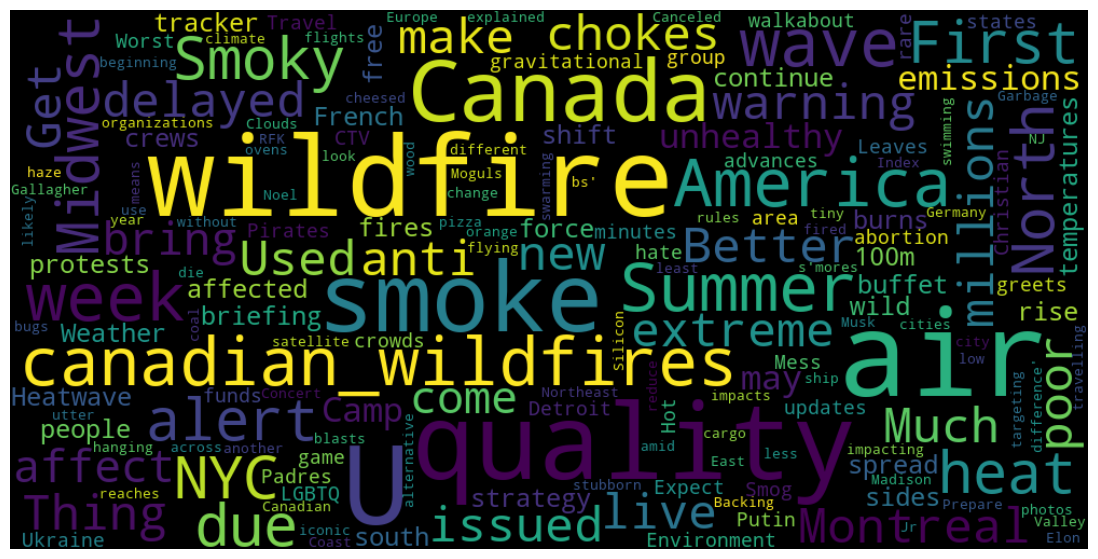

Word cloud saved as wordcloud.png and wordcloud.html


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the titles from the peak days into a single string
text = ' '.join(peak_articles['title'])

# Create a word cloud
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110, 
                      collocations=False, stopwords=stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
# Save the word cloud as a PNG image
wordcloud_image = 'wordcloud.png'
wordcloud.to_file(wordcloud_image)

# Display the word cloud image in HTML
html_content = f"<html><body><img src='{wordcloud_image}'></body></html>"


# Save the HTML file
html_file = 'wordcloud.html'
with open(html_file, 'w') as file:
    file.write(html_content)

print(f"Word cloud saved as {wordcloud_image} and {html_file}")




[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


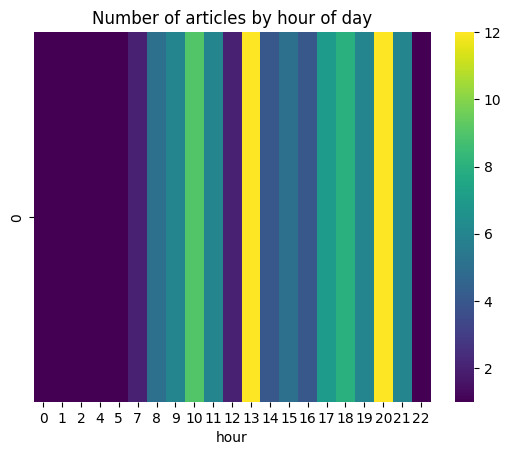

In [50]:
#!pip install seaborn
import seaborn as sns

# Create a new column for the hour of the day
df['hour'] = df.index.hour

# Group by hour and get the count of articles
hourly_counts = df.groupby('hour').size()

# Plot
sns.heatmap(hourly_counts.to_frame().T, cmap='viridis')
plt.title('Number of articles by hour of day')
plt.show()
